# Results Analysis and Visualization

<div class="alert alert-block alert-info">
In this notebook, we investigate the results obtained from the two pipelines applied on the data.
</div>

## Workspace Setup

In [1]:
# Import neccessary packages

import numpy as np
import pandas as pd
import random
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

import stylecloud
from wordcloud import (WordCloud, 
                       ImageColorGenerator,
                       STOPWORDS)

In [2]:
# Settings to display dataframes

pd.options.display.max_colwidth=60
#pd.options.display.max_rows=None
pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Settings for figures and plots

%matplotlib inline

sns.set_style("darkgrid")
colors = sns.color_palette('PuBuGn')

## Working with Original Entities

<div class="alert alert-block alert-info">
In this section we analyze the distribution and other factors regarding the entities extracted using the <tt>medmentions_coarse</tt> pretrained model. The model recognizes up to  are 109 entitities, of which 42 are present in the present corpus. 
</div>

In [4]:
# read the data from the file
df1 = pd.read_csv("data/augm_titles_original.csv", index_col=['index']).drop(columns="Unnamed: 0")
df1.head(2)

,text,key_phrase,label,DocumentSimilarity,MMRScore,sentence
index,,,,,,
0,Prospective study of equine colic risk factors . A1 ye...,horse farms,Manufactured_Object,0.54,0.16,1
1,Dietary and other management factors associated with eq...,disease,Disease_or_Syndrome,0.54,0.16,1


In [5]:
# check the data shape
df1.shape

(855, 6)

In [6]:
# check the data types
df1.dtypes

text                   object
key_phrase             object
label                  object
DocumentSimilarity    float64
MMRScore              float64
sentence                int64
dtype: object

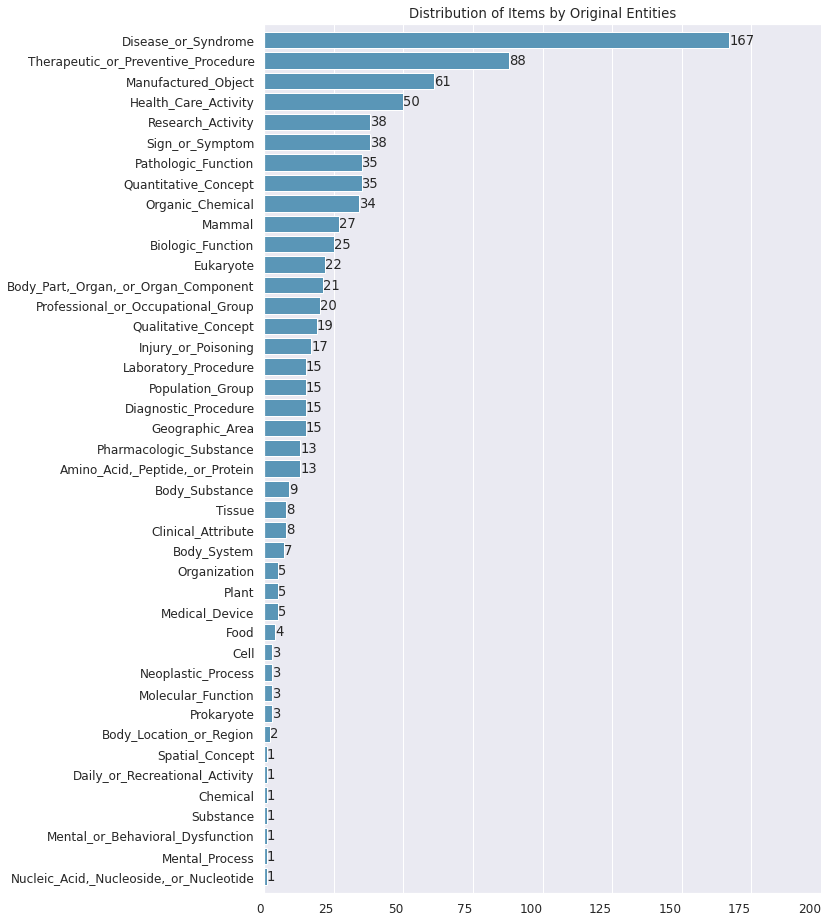

In [7]:
# Distribution of items by entities/labels

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(10,16)})
sns.set(font_scale=1.1)

# count frequencies and sort them in descending order
label_order = df1.label.value_counts().index

# create the plot, pass the order parameter to get the sorted bar plot
ax = sns.countplot(data=df1, y='label', color=colors[3], order=label_order)

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.2, y=0.01, tight=True)

# create title and axes labels
ax.bar_label(ax.containers[0])
plt.title("Distribution of Items by Original Entities")
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.xticks(rotation=0, horizontalalignment="right");

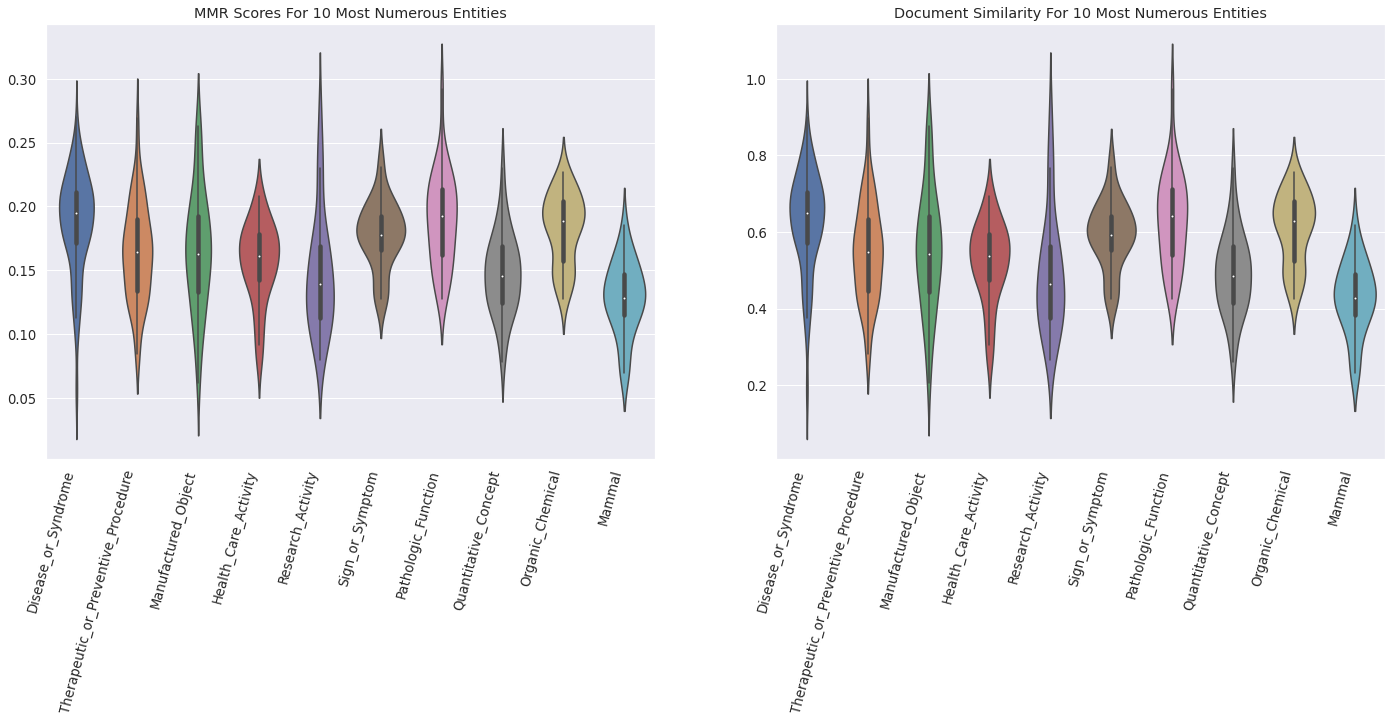

In [8]:
# The DocumentSimilarity and MMR scores for the 10 most numerous entities

# extract the 10 most numerous antities
df1_common = df1.loc[df1['label'].isin(label_order[:10])]

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(24,8)})
sns.set(font_scale=1.2)

# plot on the left
plt.subplot(1,2,1)
ax1 = sns.violinplot(data=df1_common, x='label', y='MMRScore', order=label_order[:10], truncate=False);
ax1.set(title="MMR Scores For 10 Most Numerous Entities");
plt.xticks(rotation=75, horizontalalignment="right");
ax1.set(xlabel=None);
ax1.set(ylabel=None);


# plot on right
plt.subplot(1,2,2)
ax2=sns.violinplot(data=df1_common, x='label', y='DocumentSimilarity', order=label_order[:10], truncate=False);
ax2.set(title="Document Similarity For 10 Most Numerous Entities");
plt.xticks(rotation=75, horizontalalignment="right");
ax2.set(xlabel=None);
ax2.set(ylabel=None);

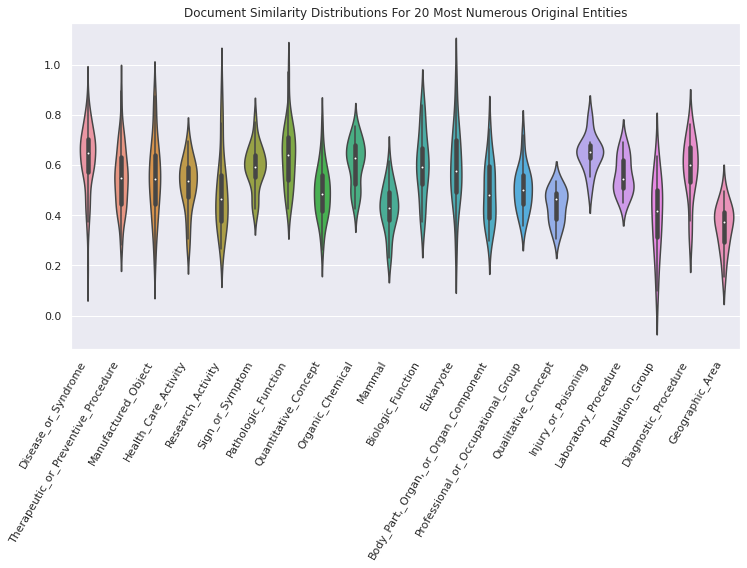

In [9]:
# The DocumentSimilarity Distributions for the 20 most numerous entities

# extract the 10 most numerous antities
df1_common20 = df1.loc[df1['label'].isin(label_order[:20])]

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(12,6)})
sns.set(font_scale=1)

# create the plot
ax = sns.violinplot(data=df1_common20, x='label', y='DocumentSimilarity',
                    order=label_order[:20], truncate=False);
ax.set(title="Document Similarity Distributions For 20 Most Numerous Original Entities");
plt.xticks(rotation=60, horizontalalignment="right");
ax.set(xlabel=None);
ax.set(ylabel=None);

In [10]:
# 5 numbers statistics for DocumentSimilarity scores
df1.DocumentSimilarity.describe()

count   855.00
mean      0.56
std       0.14
min       0.10
25%       0.46
50%       0.56
75%       0.65
max       0.97
Name: DocumentSimilarity, dtype: float64

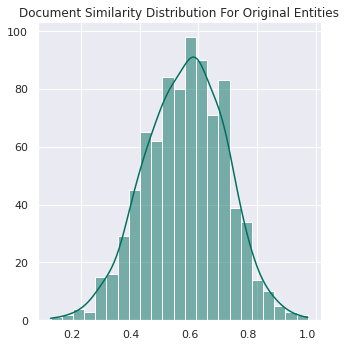

In [11]:
# The overall Document Similarity Distributions

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(12,6)})
sns.set(font_scale=1)

# create the plot
ax = sns.displot(df1.DocumentSimilarity, kde=True, color=colors[5])
ax.set(title="Document Similarity Distribution For Original Entities");
plt.xticks(rotation=0, horizontalalignment="right");
ax.set(xlabel=None);
ax.set(ylabel=None);

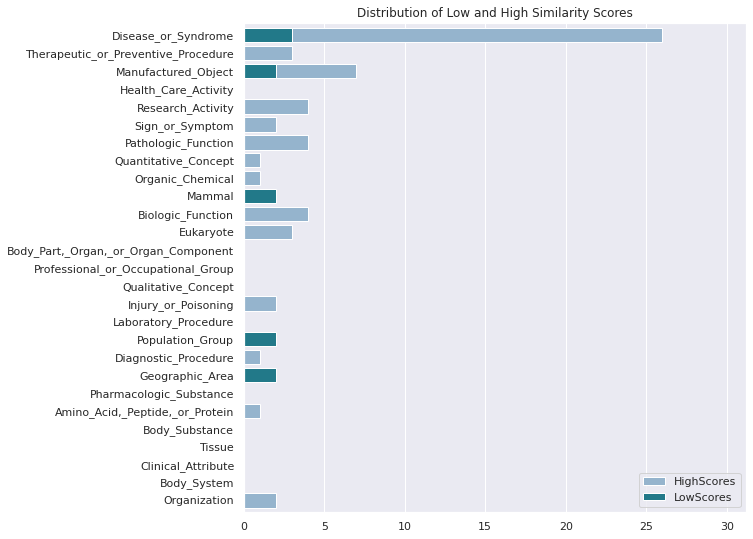

In [12]:
# Distribution of items by entities/labels

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(9,9)})
sns.set(font_scale=1)

# create the plot, pass the order parameter to get the sorted bar plot
ax2 = sns.countplot(data=df1[df1.DocumentSimilarity > 0.75],
                   y='label', color=colors[2], order=label_order, label='HighScores')
ax1 = sns.countplot(data=df1[df1.DocumentSimilarity < 0.25],
                   y='label', color=colors[4], order=label_order, label='LowScores')

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.2, y=0.01, tight=True)

# create title and axes labels
plt.title("Distribution of Low and High Similarity Scores");
plt.ylabel("");
plt.xlabel("");
plt.legend(loc="lower right");

In [13]:
# the number of unique entries in each column
df1.nunique()

text                  854
key_phrase            623
label                  42
DocumentSimilarity    853
MMRScore              853
sentence                6
dtype: int64

In [14]:
# choose several entities to analyse
entities_sample = ['Disease_or_Syndrome', 'Therapeutic_or_Preventive_Procedure', 'Research_Activity',
                   'Manufactured_Object', 'Health_Care_Activity', 'Pathologic_Function']

In [15]:
# extract the 2 key_phrases with hihest similarity scores for the analyzed entities
df1_short = df1.loc[df1['label'].isin(entities_sample)]
df1_display = df1_short.sort_values(['label','DocumentSimilarity'], ascending=False).groupby('label').head(2)
df1_display[['key_phrase', 'label']]

,key_phrase,label
index,,
773,surgery Equine colic surgery,Therapeutic_or_Preventive_Procedure
984,colic-evidence-based therapy,Therapeutic_or_Preventive_Procedure
305,Whirl Equine Colic Research Laboratory and the … | 2 Isl...,Research_Activity
295,diagnosis of colic in equine field study,Research_Activity
893,Gastric pathology,Pathologic_Function
749,severe endotoxemia,Pathologic_Function
639,"Whirl Equine Colic Research Laboratory, College of Veter...",Manufactured_Object
468,"Fifth Equine Colic Research Symposium, University of Geo...",Manufactured_Object
570,vital for colic treatment,Health_Care_Activity


### Grouped Original Entities

<div class="alert alert-block alert-info">
The augmented titles for each entity are grouped together in a single document and a key phrase is extracted from each group, using the same pipeline.
</div>

In [16]:
# read the data that contains key phrases for the combined items analysis
df11 = pd.read_csv("data/original_concat.csv")

In [17]:
# extract the key phrases for combined items and for the short list of entities
df11_short = df11.loc[df11['label'].isin(entities_sample)]
df11_short[['key_phrase', 'label']]

,key_phrase,label
2,Prognosis of Equine Colic by Clinico-Pathological Tests,Research_Activity
5,Management of the surgical equine colic patient,Health_Care_Activity
9,"Whirl Equine Colic Research Grant, University of …, Sur...",Manufactured_Object
19,disease,Disease_or_Syndrome
28,diagnosis of colic in equine field study,Research_Activity
34,operative neutrophilic inflammation,Pathologic_Function
38,TREATING ABDOMINAL DISORDERS IN HORSES,Disease_or_Syndrome


<div class="alert alert-block alert-info">
When grouping the elements together a couple of labels have changed, as we notice a double occurrence of the <tt>Disease_or_Syndrome</tt> entity.
</div>

### Grouped Key Phrases for Original Entities

<div class="alert alert-block alert-info">
For each of the 42 original entities, we combine all the extracted key phrases in a single list per entity. We take a simplistic approach here and draw several wordclouds for these groups of words.
</div>

In [18]:
# extract the lists of combined keys for the selected entities
df12 = pd.read_csv("data/original_concat_keys.csv")

In [19]:
# select the columns of interest
df12_short = df12.loc[df12['label'].isin(entities_sample)]
df12_display = df12_short[['text', 'label']]

In [20]:
# get and update the stopwords to be removed from the wordcloud
stopwords = set(STOPWORDS)
stopwords.update(['equine', 'colic', 'horse', 'horses'])

In [21]:
import re 

def entityWordCloud(text, stopwords, width, height, margin):
    '''
    Function to create a wordcloud for the given text.
    '''

    # prepare the text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text).lower().strip()
    
    # create the word cloud
    wc = WordCloud(background_color='black',
                   stopwords=stopwords, width=width, height=height,
                   colormap='tab20',
                   margin=margin, random_state=42).generate(text)
    return wc

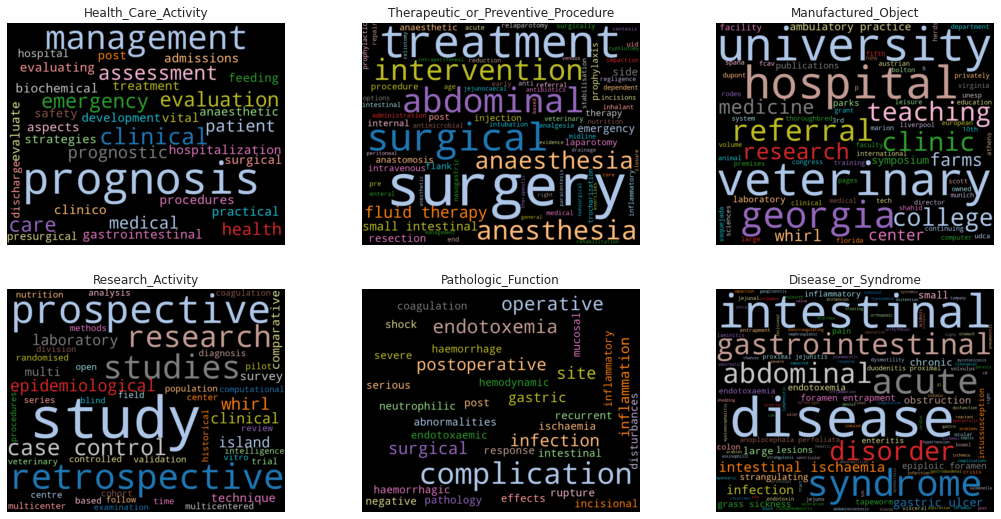

In [22]:
# wordclouds for the selected entities key phrases sets
fig = plt.figure(figsize=(18,9))


for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    wc = entityWordCloud(df12_short.text.iloc[i],stopwords,1000,800,1)
    
    # display the fitted and recolored wordcloud
    ax.imshow(wc, interpolation="bilinear")
    plt.title(df12_short.label.iloc[i])
    ax.axis('off')
    

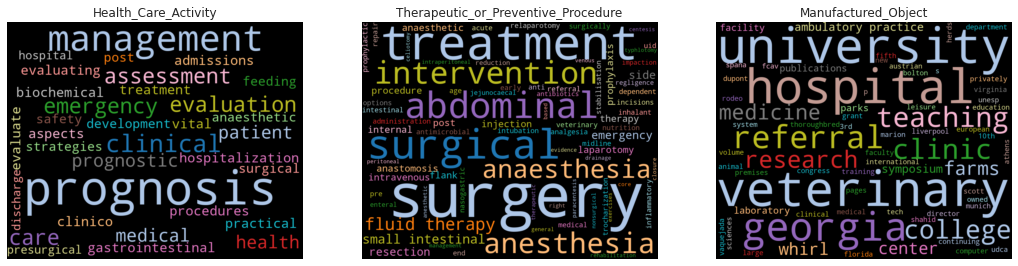

In [23]:
# wordclouds for the selected entities key phrases sets
fig = plt.figure(figsize=(18,9))


for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    wc = entityWordCloud(df12_short.text.iloc[i],stopwords,1000,800,1)
    
    # display the fitted and recolored wordcloud
    ax.imshow(wc, interpolation="bilinear")
    plt.title(df12_short.label.iloc[i])
    ax.axis('off')

## Working with New Entities

<div class="alert alert-block alert-info">
The new entities are obtained from grouping together 2 or more of the original entities, and then extract key phrases for these combined entities.
</div>

In [24]:
# read the data from the file
df2 = pd.read_csv("data/augm_titles_new.csv", index_col=['index']).drop(columns="Unnamed: 0")
df2.head(2)

,text,key_phrase,label,DocumentSimilarity,MMRScore,sentence
index,,,,,,
0,Prospective study of equine colic risk factors . A1 ye...,horse farms,Human_Related_Activities,0.54,0.16,1
1,Dietary and other management factors associated with eq...,disease,Disease_and_Symptoms,0.54,0.16,1


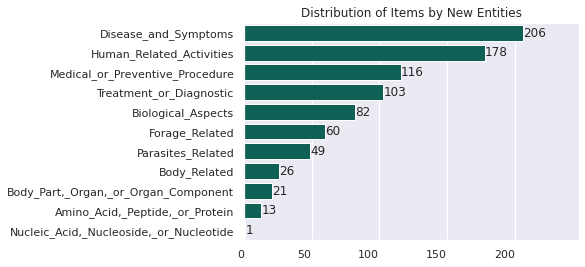

In [25]:
# Distribution of items by entities/labels

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(6,4)})
sns.set(font_scale=1)

# count frequencies and sort them in descending order
label_order_new = df2.label.value_counts().index

# create the plot, pass the order parameter to get the sorted bar plot
ax = sns.countplot(data=df2, y='label', color=colors[5], order=label_order_new)

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.2, y=0.01, tight=True)

# create title and axes labels
ax.bar_label(ax.containers[0])
plt.title("Distribution of Items by New Entities")
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.xticks(rotation=0, horizontalalignment="right");

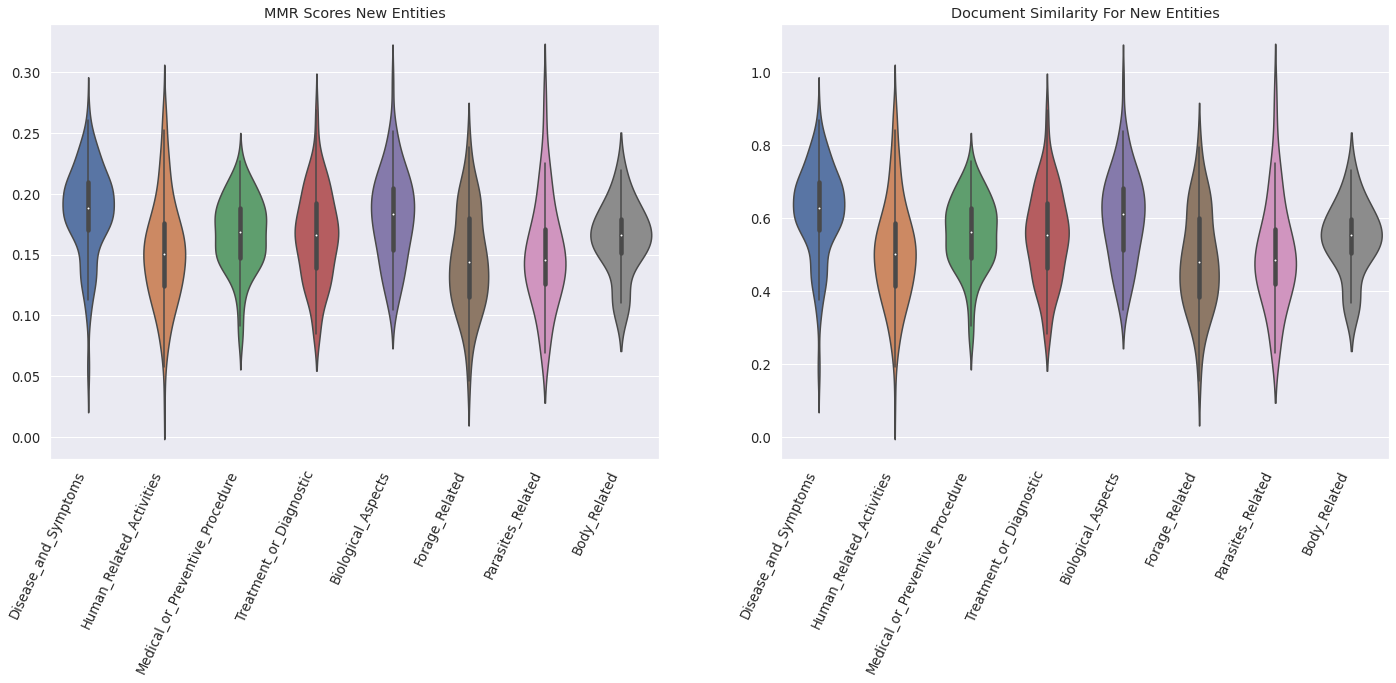

In [26]:
# The DocumentSimilarity and MMR scores (omit the smallest 3 entities)

# adjust figure and fontsize
sns.set(rc = {"figure.figsize":(24,8)})
sns.set(font_scale=1.2)

# plot on the left
plt.subplot(1,2,1)
ax1 = sns.violinplot(data=df2, x='label', y='MMRScore', order=label_order_new[:-3], truncate=False);
ax1.set(title="MMR Scores New Entities");
plt.xticks(rotation=65, horizontalalignment="right");
ax1.set(xlabel=None);
ax1.set(ylabel=None);


# plot on right
plt.subplot(1,2,2)
ax2=sns.violinplot(data=df2, x='label', y='DocumentSimilarity', order=label_order_new[:-3], truncate=False);
ax2.set(title="Document Similarity For New Entities");
plt.xticks(rotation=65, horizontalalignment="right");
ax2.set(xlabel=None);
ax2.set(ylabel=None);

In [27]:
# the number of unique entries in each column
df2.nunique()

text                  854
key_phrase            623
label                  11
DocumentSimilarity    853
MMRScore              853
sentence                6
dtype: int64

In [28]:
# choose several entities to analyse
new_entities_sample = label_order_new[:6]

In [29]:
# extract the 2 best document similarities key_phrases for the sample entities
df2_short = df2.loc[df2['label'].isin(new_entities_sample)]
df2_display = df2_short.sort_values(['label','DocumentSimilarity'], ascending=False).groupby('label').head(2)
df2_display[['key_phrase', 'label']]

,key_phrase,label
index,,
773,surgery Equine colic surgery,Treatment_or_Diagnostic
984,colic-evidence-based therapy,Treatment_or_Diagnostic
274,FLUNIXIN MEGLUMINE,Medical_or_Preventive_Procedure
1013,flunixin meglumine,Medical_or_Preventive_Procedure
305,Whirl Equine Colic Research Laboratory and the … | 2 Isl...,Human_Related_Activities
639,"Whirl Equine Colic Research Laboratory, College of Veter...",Human_Related_Activities
147,Intestinal ischemia-reperfusion injury,Forage_Related
449,Intestinal ischemic injury,Forage_Related
881,TREATING ABDOMINAL DISORDERS IN HORSES,Disease_and_Symptoms


### Grouped New Entities

<div class="alert alert-block alert-info">
For each of the new entities, we combine all the extracted key phrases in a single list per entity. We take a simplistic approach here and draw several wordclouds for these groups of words.
</div>

In [30]:
# read the data that contains key phrases for the combined items analysis
df21 = pd.read_csv("data/new_concat.csv")

In [31]:
# extract the combined items key phrases for the short list of entities
df21_short = df21.loc[df21['label'].isin(new_entities_sample)]
df21_short[['key_phrase', 'label']]

,key_phrase,label
0,fatal equine colics,Forage_Related
1,Prognosis in equine medical,Medical_or_Preventive_Procedure
2,vital for colic treatment,Medical_or_Preventive_Procedure
4,"Whirl Equine Colic Research Grant, University of …, Sur...",Human_Related_Activities
5,TREATING ABDOMINAL DISORDERS IN HORSES,Disease_and_Symptoms
9,Management of the surgical equine colic patient,Medical_or_Preventive_Procedure


### Grouped Key Phrases for New Entities

In [32]:
# extract lists of combined keys for the selected entities
df22 = pd.read_csv("data/new_concat_keys.csv")

In [33]:
# select the columns of interest
df22_short = df22.loc[df22['label'].isin(new_entities_sample)]
df22_display = df22_short[['text', 'label']]

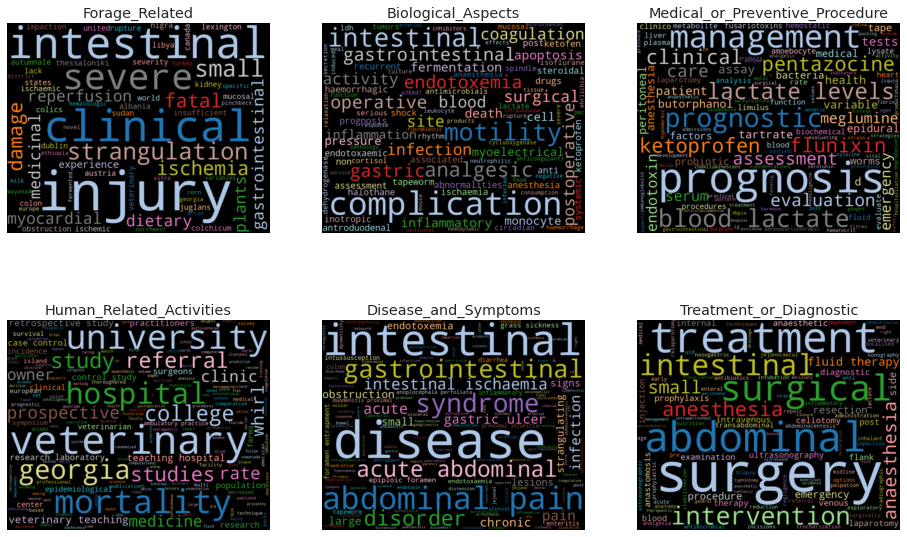

In [34]:
# wordclouds for the selected entities key phrases sets
fig = plt.figure(figsize=(16,10))


for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    wc = entityWordCloud(df22_display.text.iloc[i],stopwords,1000,800,0)
    # display the fitted and recolored wordcloud
    ax.imshow(wc, interpolation="bilinear")
    plt.title(df22_display.label.iloc[i])
    ax.axis('off')
    

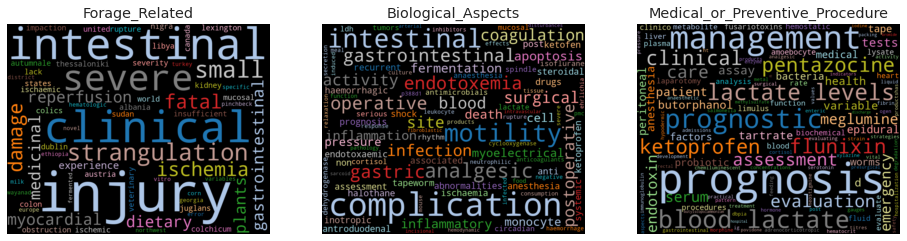

In [35]:
# wordclouds for the selected entities key phrases sets
fig = plt.figure(figsize=(16,10))


for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    wc = entityWordCloud(df22_display.text.iloc[i],stopwords,1000,800,0)
    # display the fitted and recolored wordcloud
    ax.imshow(wc, interpolation="bilinear")
    plt.title(df22_display.label.iloc[i])
    ax.axis('off')